In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import Counter
from torch.utils.data import DataLoader

In [2]:
X_test = np.load("./project/X_test.npy")
y_test = np.load("./project/y_test.npy")
person_train_valid = np.load("./project/person_train_valid.npy")
X_train_valid = np.load("./project/X_train_valid.npy")
y_train_valid = np.load("./project/y_train_valid.npy")
person_test = np.load("./project/person_test.npy")

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


(array([111.,   0.,   0., 127.,   0.,   0.,  96.,   0.,   0., 109.]),
 array([769. , 769.3, 769.6, 769.9, 770.2, 770.5, 770.8, 771.1, 771.4,
        771.7, 772. ]),
 <a list of 10 Patch objects>)

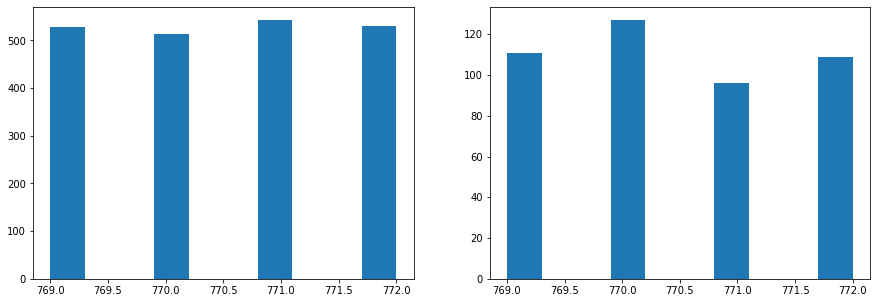

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_valid)
plt.subplot(1, 2, 2)
plt.hist(y_test)

In [5]:
y_train_valid -= 769
y_test -= 769

In [6]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.FloatTensor(X)
        self.Y = torch.LongTensor(Y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [12]:
#无downsample预处理过程
# For subject 1
X_train_valid_1 = X_train_valid[np.where(person_train_valid==0)[0]]
y_train_valid_1 = y_train_valid[np.where(person_train_valid==0)[0]]
X_test_1 = X_test[np.where(person_test==0)[0]]
y_test_1 = y_test[np.where(person_test==0)[0]]

from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_train_valid_1, y_train_valid_1,
                                                              test_size=0.2,shuffle=True)
#--------------------------------------------------------------------------------------------------------
X_train_1 = X_train_1.transpose(0,2,1)
X_valid_1 = X_valid_1.transpose(0,2,1)
X_test_1 = X_test_1.transpose(0,2,1)
train_set_1 = Dataset(X_train_1,y_train_1)
val_set_1 = Dataset(X_valid_1,y_valid_1)
test_set_1 = Dataset(X_test_1, y_test_1)
train_loader_1 = torch.utils.data.DataLoader(train_set_1,batch_size=32,shuffle=True)
val_loader_1 = torch.utils.data.DataLoader(val_set_1,batch_size=8,shuffle=True)
test_loader_1 = torch.utils.data.DataLoader(test_set_1,batch_size=10,shuffle=True)

In [13]:
print(X_train_1.shape[0])
for i, data in enumerate(train_loader_1):
    print(data[0].shape, data[1].shape)
    if i == 2:
        break

189
torch.Size([32, 1000, 22]) torch.Size([32])
torch.Size([32, 1000, 22]) torch.Size([32])
torch.Size([32, 1000, 22]) torch.Size([32])


In [10]:
#包含嵘哥的downsample预处理过程
# for one subject
X_train_valid_1 = X_train_valid[np.where(person_train_valid==0)[0]]
y_train_valid_1 = y_train_valid[np.where(person_train_valid==0)[0]]
X_test_1 = X_test[np.where(person_test==0)[0]]
y_test_1 = y_test[np.where(person_test==0)[0]]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_1, y_train_valid_1,
                                                              test_size=0.2,shuffle=True)
#---------------------------------------------------------------------------------------------------------
num_time = X_train_valid.shape[2]
sample_1 = list(np.arange(0,num_time,2))
sample_2 = list(np.arange(1,num_time,2))

X_train_1 = X_train[:,:,sample_1]
X_train_2 = X_train[:,:,sample_2]

X_val_1 = X_valid[:,:,sample_1]
X_val_2 = X_valid[:,:,sample_2]

X_test_s1 = X_test_1[:,:,sample_1]
X_test_s2 = X_test_1[:,:,sample_2]

X_train_s = np.concatenate((X_train_1,X_train_2), axis=0)
y_train_s = np.concatenate((y_train,y_train), axis=0)

X_val_s = np.concatenate((X_val_1,X_val_2), axis=0)
y_val_s = np.concatenate((y_valid,y_valid), axis=0)

#person_train_s = np.concatenate((person_train_valid,person_train_valid), axis=0)

#X_test_s = np.concatenate((X_test_s1,X_test_s2), axis=0)
X_test_s = X_test_s1
#y_test_s = np.concatenate((y_test,y_test), axis=0)
y_test_s = y_test_1
#person_test_s = np.concatenate((person_test,person_test), axis=0)
#person_test_s = person_test
print(X_train_s.shape)
print(y_train_s.shape)
print(X_val_s.shape)
print(X_test_s.shape)
#---------------------------------------------------------------------------------------------------------
X_train_s = X_train_s.transpose(0,2,1)
X_val_s = X_val_s.transpose(0,2,1)
X_test_s = X_test_s.transpose(0,2,1)
train_set_1 = Dataset(X_train_s,y_train_s)
val_set_1 = Dataset(X_val_s,y_val_s)
test_set_1 = Dataset(X_test_s, y_test_s)
train_loader_1 = torch.utils.data.DataLoader(train_set_1,batch_size=32,shuffle=True)
val_loader_1 = torch.utils.data.DataLoader(val_set_1,batch_size=8,shuffle=True)
test_loader_1 = torch.utils.data.DataLoader(test_set_1,batch_size=10,shuffle=True)


(378, 22, 500)
(378,)
(96, 22, 500)
(50, 22, 500)


In [11]:
print(X_train_s.shape[0])
for i, data in enumerate(train_loader_1):
    print(data[0].shape, data[1].shape)
    if i == 2:
        break

378
torch.Size([32, 500, 22]) torch.Size([32])
torch.Size([32, 500, 22]) torch.Size([32])
torch.Size([32, 500, 22]) torch.Size([32])


In [14]:
#和CNN.ipynb中一样的结构，这里想训练出一个较好的CNN并且提取前两层作为之后的LSTM之前用来提取特征的工具
# [conv-relu]*2 -> 2*2 max-pooling -> [conv-relu]*3 -> 2*2 max_pooling -> (affine-relu)*2 -> affine -> softmax
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()  # initial the model
        self.conv1 = nn.Conv1d(22,40,kernel_size = 2,stride = 2) 
        self.bn1 = nn.BatchNorm1d(40)
        self.conv2 = nn.Conv1d(40,60,kernel_size = 3,stride = 1) 
        self.bn2 = nn.BatchNorm1d(60) 
        self.pool1 = nn.MaxPool1d(2,2) 
        
        self.conv3 = nn.Conv1d(60,80,kernel_size = 3, stride = 1) 
        self.bn3 = nn.BatchNorm1d(80)
        self.conv4 = nn.Conv1d(80,100,kernel_size = 3, stride = 1) 
        self.bn4 = nn.BatchNorm1d(100)
        self.conv5 = nn.Conv1d(100,120,kernel_size = 3, stride = 2) #120*122
        self.bn5 = nn.BatchNorm1d(120)
        self.pool2 = nn.MaxPool1d(2,2) #120*61
        
        self.fc1 = nn.Linear(120*61, 300) # input dim , output dim
        self.bn6 = nn.BatchNorm1d(300)
        self.drop1 = nn.Dropout(0.8)
        self.fc2 = nn.Linear(300,40)  
        self.bn7 = nn.BatchNorm1d(40)
        self.drop2 = nn.Dropout(0.8)
        self.fc3 = nn.Linear(40,4)
 
    def forward(self,x):
        x = torch.Tensor(x.numpy().transpose(0,2,1))
        x = self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(F.relu(self.bn5(self.conv5(x))))
        x = x.view(-1,120*61)
        
        x = self.drop1(F.relu(self.bn6(self.fc1(x))))
        x = self.drop2(F.relu(self.bn7(self.fc2(x))))
        x = self.fc3(x)
        return x
net = Net()
print(net)
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(net.parameters(),lr = 0.01)
optimizer = torch.optim.RMSprop(net.parameters(),lr = 0.001)

Net(
  (conv1): Conv1d(22, 40, kernel_size=(2,), stride=(2,))
  (bn1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(40, 60, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(60, 80, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(80, 100, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv1d(100, 120, kernel_size=(3,), stride=(2,))
  (bn5): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=7320, out_features=300, bias=True)
  (bn6): BatchNorm1d(300,

Epoch 0 | Iter1 | Loss1.6201 | TrainAcc0.1250 | val acc 0.3750
Epoch 0 | Iter3 | Loss1.3951 | TrainAcc0.3438 | val acc 0.3750
Epoch 0 | Iter5 | Loss1.4615 | TrainAcc0.3793 | val acc 0.3750
Epoch 1 | Iter1 | Loss1.4310 | TrainAcc0.2188 | val acc 0.3750
Epoch 1 | Iter3 | Loss1.3499 | TrainAcc0.3438 | val acc 0.3750
Epoch 1 | Iter5 | Loss1.6441 | TrainAcc0.2069 | val acc 0.3750
Epoch 2 | Iter1 | Loss1.2853 | TrainAcc0.4688 | val acc 0.3750
Epoch 2 | Iter3 | Loss1.2487 | TrainAcc0.3750 | val acc 0.3750
Epoch 2 | Iter5 | Loss1.2691 | TrainAcc0.4483 | val acc 0.3125
Epoch 3 | Iter1 | Loss1.3575 | TrainAcc0.4688 | val acc 0.3333
Epoch 3 | Iter3 | Loss1.3721 | TrainAcc0.2188 | val acc 0.3333
Epoch 3 | Iter5 | Loss1.4464 | TrainAcc0.2414 | val acc 0.3958
Epoch 4 | Iter1 | Loss1.3905 | TrainAcc0.3438 | val acc 0.2500
Epoch 4 | Iter3 | Loss1.6627 | TrainAcc0.4062 | val acc 0.2500
Epoch 4 | Iter5 | Loss1.0573 | TrainAcc0.4828 | val acc 0.2292
Epoch 5 | Iter1 | Loss1.0601 | TrainAcc0.5938 | val acc

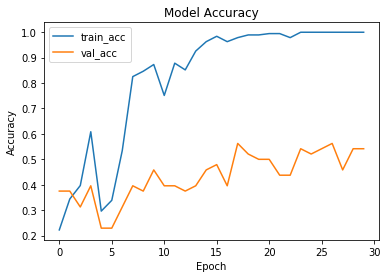

In [15]:
net = Net()
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(net.parameters(),lr = 0.01)
optimizer = torch.optim.RMSprop(net.parameters(),lr = 0.001)
val_acc_history = []
train_acc_history = []
for epoch in range(30):
    for i , data in enumerate(train_loader_1, 0):
        inputs, labels = data
        
        net.train()
        
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _,predicted = torch.max(outputs.data, 1)
        train_acc = (predicted == labels).sum().item() / len(labels)
        
        if i % 2 == 1:
            net.eval()
            val_correct, val_total = 0, 0 
            for val_data in val_loader_1:
                val_images, val_labels = val_data
                val_outputs = net(val_images)
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()
            val_acc = val_correct / val_total
            print('Epoch {} | Iter{} | Loss{:.4f} | TrainAcc{:.4f} | val acc {:.4f}'.format(
                epoch, i , loss, train_acc, val_acc))
            #writer.add_scalar('Train/Loss',loss,epoch*len(trainloader) + i)
            #writer.add_scalar('Train/ACC',train_acc,epoch*len(trainloader) + i)
            #writer.add_scalar('VAL/ACC',val_acc,epoch*len(trainloader) + i)
    net.eval()
    train_correct, train_total = 0, 0
    for train_data in train_loader_1:
        train_inputs, train_labels = train_data
        train_outputs = net(train_inputs)
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_total += train_labels.size(0)
        train_correct += (train_predicted == train_labels).sum().item()
    train_acc = train_correct / train_total
    train_acc_history.append(train_acc)
    val_correct, val_total = 0, 0
    for val_data in val_loader_1:
        val_images, val_labels = val_data
        val_outputs = net(val_images)
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_total += val_labels.size(0)
        val_correct += (val_predicted == val_labels).sum().item()
    val_acc = val_correct / val_total
    val_acc_history.append(val_acc)
    #if val_acc == max(val_acc_history):
    #    net_best = Net()
    #    net_best.load_state_dict(net.state_dict())
        
test_correct, test_total = 0, 0
for test_data in test_loader_1:
    test_inputs, test_labels = test_data
    
    test_outputs = net(test_inputs)
    #test_outputs = net_best(test_images)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_total += test_labels.size(0)
    test_correct += (test_predicted == test_labels).sum().item()
test_acc = test_correct / test_total
print('Test accuracy is: ',test_acc)
plt.plot(train_acc_history,)
plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train_acc','val_acc'])

In [16]:
#定义一个只包含上面的CNN的前两层的class
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()  # initial the model
        self.conv1 = nn.Conv1d(22,40,kernel_size = 2,stride = 2) 
        self.bn1 = nn.BatchNorm1d(40)
        self.conv2 = nn.Conv1d(40,60,kernel_size = 3,stride = 1) 
        self.bn2 = nn.BatchNorm1d(60) 
        self.pool1 = nn.MaxPool1d(2,2) 
 
    def forward(self,x):
        x = torch.Tensor(x.numpy().transpose(0,2,1))
        x = self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
        x = torch.Tensor(x.detach().numpy().transpose(0,2,1))
        return x

In [17]:
#把已经train了的CNN的前两层提取出来，作为之后的LSTM之前用来提取特征的工具
convnet = ConvNet()
pretrained_dict = net.state_dict()
convnet_dict = convnet.state_dict()
pretrained_dict = {k:v for k,v in pretrained_dict.items() if k in convnet_dict}
convnet_dict.update(pretrained_dict)
convnet.load_state_dict(convnet_dict)

<All keys matched successfully>

In [ ]:
# 两层CNN + 三层LSTM
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(LSTM, self).__init__()
        #self.conv = convnet  #这个是用已经训练过得到的CNN
        self.conv = ConvNet()  #这个是用没有训练过的CNN
        self.LSTM1 = nn.LSTM(input_dim, hidden_dim1, bidirectional = True, num_layers=1, batch_first = True, dropout = 0)
        self.LSTM2 = nn.LSTM(hidden_dim1*2, hidden_dim2, bidirectional = True, batch_first = True)
        self.LSTM3 = nn.LSTM(hidden_dim2*2, hidden_dim3, bidirectional = True, batch_first = True)
        self.fc1 = nn.Linear(hidden_dim3*2*124, 1000) #要取决于用那种数据，249对应未处理的数据，124对应嵘哥的downsample数据（嵘哥ds！）
        self.bn1 = nn.BatchNorm1d(1000)
        self.drop1 = nn.Dropout(0.9)
        self.fc2 = nn.Linear(1000,100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100,output_dim)
        
    
    def forward(self, x, h=None, c=None):
        x = self.conv(x)
        if type(h) == type(None) and type(c) == type(None):
            out, (hn, cn) = self.LSTM1(x)
            out, (hn, cn) = self.LSTM2(out)
            out, (hn, cn) = self.LSTM3(out)
        else:
            out, (hn, cn) = self.LSTM1(x, h.detach(), c.detach())
            out, (hn, cn) = self.LSTM2(out, h.detach(), c.detach())
            out, (hn, cn) = self.LSTM3(out, h.detach(), c.detach())
        #out = self.drop1(F.relu(self.bn1(self.fc1(out[:, -1, :]))))
        out = self.drop1(F.relu(self.bn1(self.fc1(out.reshape(out.shape[0],-1)))))
        out = self.drop1(F.relu(self.bn2(self.fc2(out))))
        out = self.fc3(out)
        
        return out

In [ ]:
# 两层CNN + 两层LSTM
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(LSTM, self).__init__()
        #self.conv = convnet  #这个是用已经训练过得到的CNN
        self.conv = ConvNet()  #这个是用没有训练过的CNN
        self.LSTM1 = nn.LSTM(input_dim, hidden_dim1, bidirectional = True, num_layers = 2, batch_first = True, dropout = 0)
        self.LSTM2 = nn.LSTM(hidden_dim1*2, hidden_dim2, bidirectional = True, num_layers = 2, batch_first = True, dropout = 0.6)
        self.fc1 = nn.Linear(hidden_dim2*2*124, 1000)  #要取决于用那种数据，249对应未处理的数据，124对应嵘哥的downsample数据（嵘哥ds！）
        self.bn1 = nn.BatchNorm1d(1000)
        self.drop1 = nn.Dropout(0.8)
        self.fc2 = nn.Linear(1000,100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100,output_dim)
        
    
    def forward(self, x, h=None, c=None):
        x = self.conv(x)
        if type(h) == type(None) and type(c) == type(None):
            out, (hn, cn) = self.LSTM1(x)
            out, (hn, cn) = self.LSTM2(out)
        else:
            out, (hn, cn) = self.LSTM1(x, h.detach(), c.detach())
            out, (hn, cn) = self.LSTM2(out, h.detach(), c.detach())
        #out = self.drop1(F.relu(self.bn1(self.fc1(out[:, -1, :]))))
        out = self.drop1(F.relu(self.bn1(self.fc1(out.reshape(out.shape[0],-1)))))
        out = self.drop1(F.relu(self.bn2(self.fc2(out))))
        out = self.fc3(out)
        
        return out

In [ ]:
# 两层CNN + 一层LSTM
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTM, self).__init__()
        #self.conv = convnet  #这个是用已经训练过得到的CNN
        self.conv = ConvNet()  #这个是用没有训练过的CNN
        self.LSTM = nn.LSTM(input_dim, hidden_dim, bidirectional = True, num_layers=1, batch_first = True, dropout = 0)
        self.fc1 = nn.Linear(hidden_dim*2*124, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.drop1 = nn.Dropout(0.8)
        self.fc2 = nn.Linear(1000,4)
    
    def forward(self, x, h=None, c=None):
        if type(h) == type(None) and type(c) == type(None):
            out, (hn, cn) = self.LSTM(x)
        else:
            out, (hn, cn) = self.LSTM(x, h.detach(), c.detach())
        #out = self.drop1(F.relu(self.bn1(self.fc1(out[:, -1, :]))))
        out = self.drop1(F.relu(self.bn1(self.fc1(out.reshape(out.shape[0],-1)))))
        out = self.fc2(out)
         
        return out

In [ ]:
input_dim = 60
hidden_dim = 40
output_dim = 4
model = LSTM(input_dim, hidden_dim, output_dim)
#model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(),alpha = 0.99, lr=0.001, weight_decay = 0.01)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
input_dim = 60
hidden_dim1 = 50
hidden_dim2 = 40
output_dim = 4
model = LSTM(input_dim, hidden_dim1, hidden_dim2, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(),alpha = 0.99, lr=0.001, weight_decay = 0.01)

In [ ]:
input_dim = 60
hidden_dim1 = 40
hidden_dim2 = 40
hidden_dim3 = 40
output_dim = 4
model = LSTM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(),alpha = 0.99, lr=0.001, weight_decay = 0.01)

In [ ]:
val_acc_history = []
train_acc_history = []
train_loss_history = []
val_loss_history = []
t0 = time.time()
num_epochs = 100
for epoch in range(num_epochs):
    tstart = time.time()
    for i, data in enumerate(train_loader_1):
        inputs, labels = data
        #inputs = convnet(inputs)
        #inputs = torch.Tensor(inputs.detach().numpy().transpose(0,2,1)) #249*60
        model.train()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _,predicted = torch.max(outputs.data, 1)
        train_acc = (predicted == labels).sum().item() / len(labels)
    model.eval()
    train_correct, train_total = 0, 0
    train_loss = 0
    for train_data in train_loader_1:
        train_inputs, train_labels = train_data
        #train_inputs = convnet(train_inputs)
        #train_inputs = torch.Tensor(train_inputs.detach().numpy().transpose(0,2,1)) #249*60
        train_outputs = model(train_inputs)
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_total += train_labels.size(0)
        train_correct += (train_predicted == train_labels).sum().item()
        train_loss += criterion(train_outputs, train_labels).item()
    train_acc = train_correct / train_total
    train_acc_history.append(train_acc)
    train_loss_history.append(train_loss)
        
    #pXtrain = model(Xtrain)
    #ptrain = torch.argmax(pXtrain, axis = 1)
    #train_acc = np.mean(ptrain.numpy() == ytrain.numpy())
    #train_accs.append(train_acc)
    #tloss = criterion(pXtrain, ytrain)
    #train_losses.append(tloss.item())
    
    val_correct, val_total = 0, 0
    val_loss = 0
    for val_data in val_loader_1:
        val_inputs, val_labels = val_data
        #val_inputs = convnet(val_inputs)
        #val_inputs = torch.Tensor(val_inputs.detach().numpy().transpose(0,2,1)) #249*60
        val_outputs = model(val_inputs)
        _, val_predicted = torch.max(val_outputs.data, 1)
        val_total += val_labels.size(0)
        val_correct += (val_predicted == val_labels).sum().item()
        val_loss += criterion(val_outputs, val_labels).item()
    val_acc = val_correct / val_total
    val_acc_history.append(val_acc)
    val_loss_history.append(val_loss)
    
    #pXval = model(Xval)
    #pval = torch.argmax(pXval, axis = 1)
    #val_acc = np.mean(pval.numpy() == yval.numpy())
    #val_accs.append(val_acc)
    #vloss = criterion(pXval, yval)
    #val_losses.append(vloss.item())
    tend = time.time()
    print('epoch: {:<3d}    time: {:<3.2f}    train_loss: {:<3.3f}    train acc: {:<1.3f}    val_loss: {:<3.3f}    val acc: {:<1.3f}'.format(epoch+1, 
            tend - tstart, train_loss, train_acc, val_loss, val_acc))
time_total = time.time() - t0
print('Total time: {:4.3f} seconds, average time per epoch: {:4.3f}'.format(time_total, time_total / num_epochs))

test_correct, test_total = 0, 0
for test_data in test_loader_1:
    test_inputs, test_labels = test_data
    #test_inputs = convnet(test_inputs)
    #test_inputs = torch.Tensor(test_inputs.detach().numpy().transpose(0,2,1)) #249*60
    test_outputs = model(test_inputs)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_total += test_labels.size(0)
    test_correct += (test_predicted == test_labels).sum().item()
test_acc = test_correct / test_total
print('Test accuracy is: ',test_acc)

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.title('training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.subplot(1, 2, 2)
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('loss history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()